In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Loading and Assessment

In [3]:
df=pd.read_csv('islander_data.csv')
df.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


In [12]:
df.shape

(198, 9)

In [4]:
df.dtypes # checking the datatypes for each column

first_name           object
last_name            object
age                   int64
Happy_Sad_group      object
Dosage                int64
Drug                 object
Mem_Score_Before    float64
Mem_Score_After     float64
Diff                float64
dtype: object

In [6]:
df.isnull().sum() #checking null values present in each column

first_name          0
last_name           0
age                 0
Happy_Sad_group     0
Dosage              0
Drug                0
Mem_Score_Before    0
Mem_Score_After     0
Diff                0
dtype: int64

In [8]:
df.duplicated().sum() #checking for duplicated records if any

0

In [9]:
df.describe()

,age,Dosage,Mem_Score_Before,Mem_Score_After,Diff
count,198.000000,198.000000,198.000000,198.000000,198.000000
mean,39.530303,1.989899,57.967677,60.922222,2.954545
std,12.023099,0.818504,15.766007,18.133851,10.754603
min,24.000000,1.000000,27.200000,27.100000,-40.400000
25%,30.000000,1.000000,46.525000,47.175000,-3.175000
50%,37.000000,2.000000,54.800000,56.750000,1.700000
75%,48.000000,3.000000,68.400000,73.250000,5.925000
max,83.000000,3.000000,110.000000,120.000000,49.000000


### Data Analysis and Visualization

In [11]:
df_clean=df.copy() #creating a copy of original dataset
df_clean.head()

,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
0,Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
1,Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
2,Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
3,Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
4,Justin,Carrasco,52,H,1,A,47.0,47.1,0.1


### Analysis of Age Column

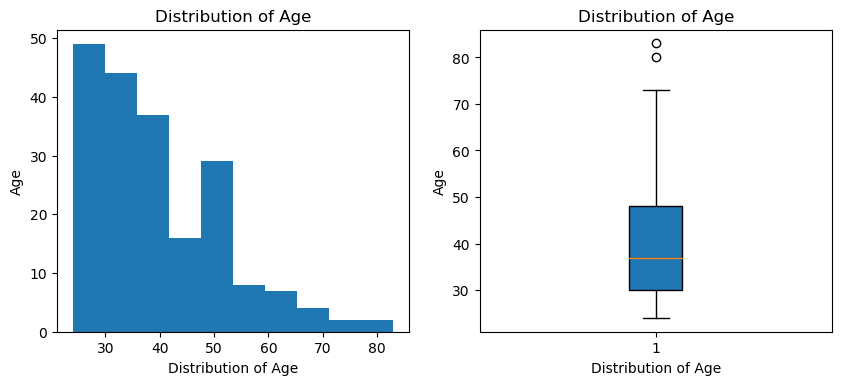

In [14]:
plt.figure(figsize=(10,4), dpi=100)
plt.subplot(1, 2, 1);
plt.hist(df_clean['age']);
plt.xlabel("Distribution of Age");
plt.ylabel("Age");
plt.title("Distribution of Age");


plt.subplot(1, 2, 2);
plt.boxplot(df_clean['age'],patch_artist=True);
plt.xlabel("Distribution of Age");
plt.ylabel("Age");
plt.title("Distribution of Age");
plt.show();

### Analysis of Drug

Drug
T    65
S    66
A    67
dtype: int64


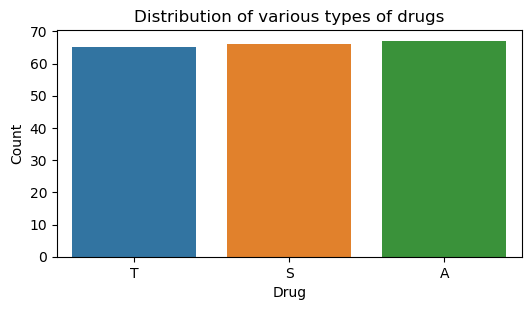

In [27]:
plt.figure(figsize=(6,3),dpi=100)
count=df_clean.groupby("Drug").size().sort_values()
print(count)
sns.barplot(x=count.index,y=count,data=df_clean);
plt.ylabel("Count");
plt.title("Distribution of various types of drugs");
plt.show()

### Analysis of drug and dosage

Drug  Dosage
A     1         23
      2         22
      3         22
S     1         22
      2         22
      3         22
T     1         22
      2         22
      3         21
dtype: int64


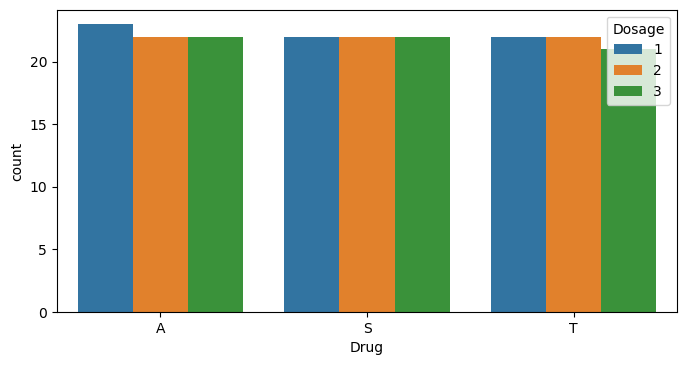

In [37]:
plt.figure(figsize=(8,4),dpi=100);
count=df_clean.groupby(['Drug','Dosage']).size()
print(count)
plt.title("Drug and Dosage")
sns.countplot(x='Drug',hue='Dosage',data=df_clean);

### Analysis of Memory Score

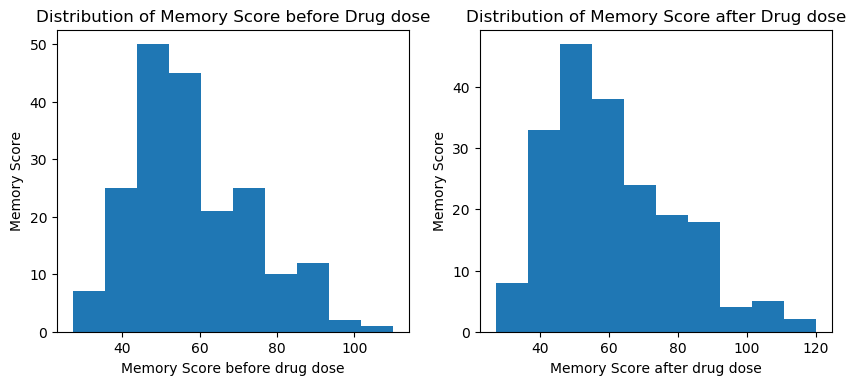

In [38]:
plt.figure(figsize=(10,4), dpi=100)
plt.subplot(1, 2, 1);
plt.hist(df_clean['Mem_Score_Before']);
plt.xlabel("Memory Score before drug dose");
plt.ylabel("Memory Score");
plt.title("Distribution of Memory Score before Drug dose");


plt.subplot(1, 2, 2);
plt.hist(df_clean['Mem_Score_After']);
plt.xlabel("Memory Score after drug dose");
plt.ylabel("Memory Score");
plt.title("Distribution of Memory Score after Drug dose");


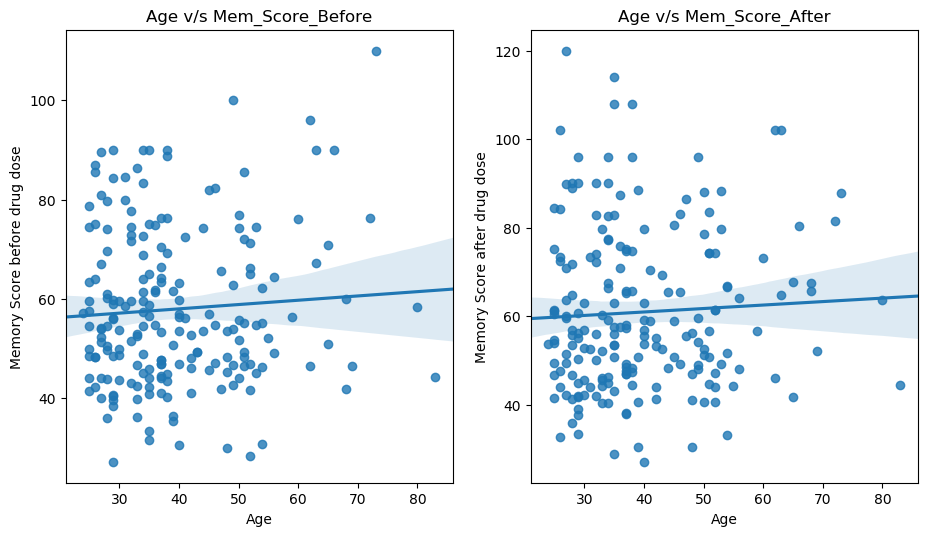

In [50]:
plt.figure(figsize=(17,6), dpi=100)
plt.subplot(1, 3, 1);
sns.regplot(x='age', y='Mem_Score_Before',data=df_clean)
plt.xlabel("Age");
plt.ylabel("Memory Score before drug dose")
plt.title("Age v/s Mem_Score_Before");


plt.subplot(1, 3, 2);
sns.regplot(x='age', y='Mem_Score_After',data=df_clean)
plt.xlabel("Age");
plt.ylabel("Memory Score after drug dose")
plt.title("Age v/s Mem_Score_After");

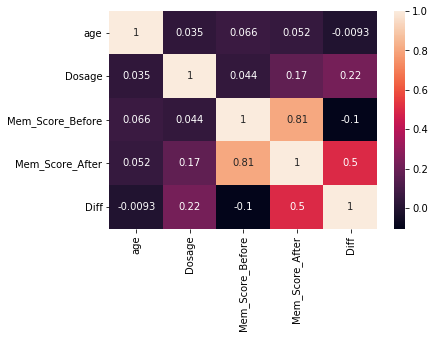

In [52]:
corrMatrix=df_clean.corr()
sns.heatmap(corrMatrix,cmap='rocket',annot=True);

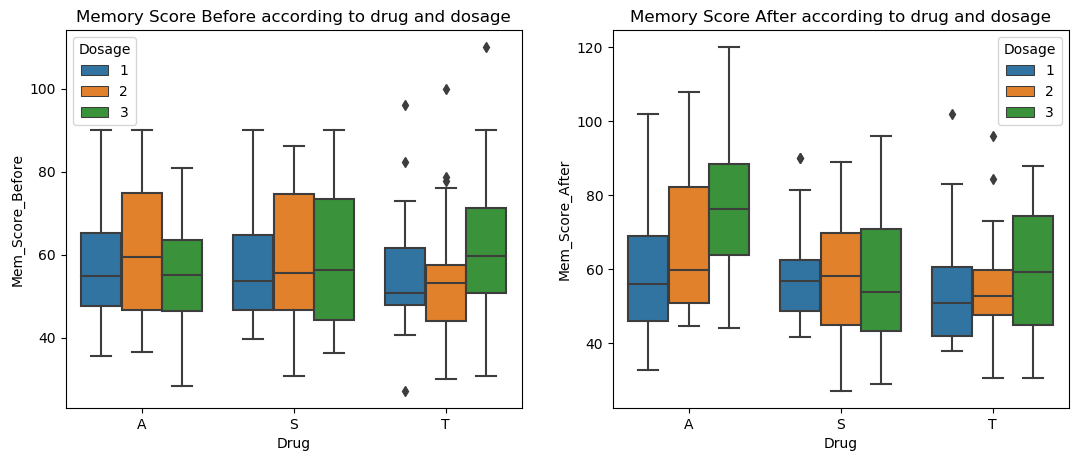

In [62]:
plt.figure(figsize=(20,5), dpi=100)
plt.subplot(1, 3, 1);
sns.boxplot(x='Drug', y='Mem_Score_Before',hue='Dosage',data=df_clean)
plt.title("Memory Score Before according to drug and dosage");

plt.subplot(1, 3, 2);
sns.boxplot(x='Drug', y='Mem_Score_After',hue='Dosage',data=df_clean)
plt.title("Memory Score After according to drug and dosage");